<a href="https://colab.research.google.com/github/vineet1947/general_code-_files-/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Required Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [2]:
X,Y=make_classification(n_samples= 200,n_features=8,n_informative=8,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2,random_state=32)
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)
X.shape

(200, 8)

#Find the value for K

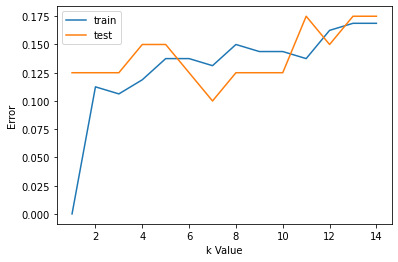

In [3]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

#Predict

In [4]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9

#HyperParameter Tuning 

In [5]:
import os
import math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# making results reproducible
np.random.seed(42)

In [6]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None, sep=',')

df.columns = ['CLASS', 'ALCOHOL_LEVEL', 'MALIC_ACID', 'ASH', 'ALCALINITY','MAGNESIUM', 'PHENOLS', 
              'FLAVANOIDS', 'NON_FLAVANOID_PHENOL', 'PROANTHOCYANINS', 'COLOR_INTENSITY', 
              'HUE', 'OD280/OD315_DILUTED','PROLINE']

# Let us use only two features : 'ALCOHOL_LEVEL', 'MALIC_ACID' for this problem
df = df[['CLASS', 'ALCOHOL_LEVEL', 'MALIC_ACID']]
df.head()

,CLASS,ALCOHOL_LEVEL,MALIC_ACID
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [7]:
class KNN:
    def __init__(self, K):
        self.K = K
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict_instance(self, test_instance):
        inputs = self.X_train.copy()
        # calculate L2 norm between all training points and given test_point
        inputs['distance'] = np.linalg.norm(inputs.values-test_instance.values, axis=1)
        
        # concatenate inputs and labels before sorting the distances
        inputs = pd.concat([inputs, self.y_train], axis=1)

        # sort based on distance
        inputs = inputs.sort_values('distance', ascending=True)

        # pick k neighbors
        neighbors = inputs.head(self.K)

        # get list from dataframe column
        classes = neighbors['CLASS'].tolist()

        # create counter of labels
        majority_count = Counter(classes)
        
        return majority_count.most_common(1).pop()[0]
        
        
    def predict(self, X_test):
        predictions = np.zeros(X_test.shape[0])
        # we want out index to be start from 0
        X_test.reset_index(drop=True, inplace=True)
        for index, row in X_test.iterrows():
            predictions[index] = self.predict_instance(row)
        return predictions

def cross_validation(n, k, data, n_neighbors):
    """
    n : # iterations
    k : k-fold size
    data: training data
    n_neighbors: k in knn
    """
    accuracies = []
    
    for _ in range(0, n):
        # data shuffle
        data.sample(frac=1)
        
        fold=int(data.shape[0]/k)
        
        for j in range(k):
            test = data[j*fold:j*fold+fold]
            train = data[~data.index.isin(test.index)]
            X_train, y_train = train.drop('CLASS', axis=1), train['CLASS']
            X_test, y_test = test.drop('CLASS', axis=1), test['CLASS']
            
            knn = KNN(n_neighbors)
            knn.fit(X_train, y_train)
            
            predictions = knn.predict(X_test)
            true_values = y_test.to_numpy()
            accuracy = np.mean(predictions == true_values)
            
            accuracies.append(accuracy)
    return np.array(accuracies).mean()

In [8]:
k_values = np.arange(1, 16)
cross_validation_fold = 10
accuracies = []

In [9]:
for k in k_values:
    # run cross-validation with given neighbor size k
    accuracy = cross_validation(1, cross_validation_fold, df, k)
    accuracies.append(accuracy)
print(accuracies)

[0.6411764705882353, 0.6411764705882353, 0.7352941176470589, 0.7588235294117647, 0.7705882352941177, 0.7588235294117647, 0.7588235294117646, 0.7529411764705881, 0.7705882352941177, 0.7705882352941177, 0.7705882352941176, 0.776470588235294, 0.7764705882352941, 0.7588235294117647, 0.7529411764705881]


Text(0.5, 0.98, 'kNN hyperparameter (k) tuning with python alone')

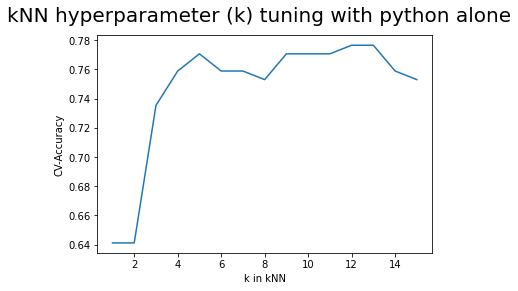

In [10]:
fig = plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
fig.suptitle('kNN hyperparameter (k) tuning with python alone', fontsize=20)

#finding Optimal Values for K

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [12]:
X, y = df.drop('CLASS', axis=1), df['CLASS']
accuracies = []
for k in k_values:
    # instantiate kNN with given neighbor size k
    knn = KNeighborsClassifier(n_neighbors=k)
    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_val_score(knn, X, y, cv=cross_validation_fold, scoring='accuracy', n_jobs=-1)
    accuracies.append(scores.mean())
print(accuracies)

[0.7405228758169934, 0.696078431372549, 0.7797385620915033, 0.7686274509803922, 0.7803921568627451, 0.7980392156862746, 0.7970588235294118, 0.7970588235294118, 0.7977124183006536, 0.7973856209150327, 0.8035947712418301, 0.8035947712418301, 0.8094771241830065, 0.8032679738562092, 0.8091503267973856]


Text(0.5, 0.98, 'kNN hyperparameter (k) tuning with sklearn')

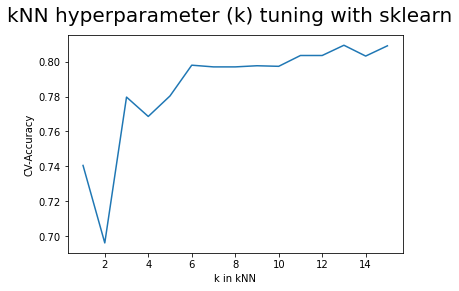

In [13]:
fig2 = plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
fig2.suptitle('kNN hyperparameter (k) tuning with sklearn', fontsize=20)

#Tune many hyperparameters together using sklearn GridSearchCV API

In [16]:
from sklearn.model_selection import GridSearchCV

In [14]:
metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 16)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)
param_grid

{'metric': ['euclidean', 'manhattan'],
 'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])}

In [17]:
# here 10-fold cross-validation is being executed for all the combinations
# total combinations will be : 15*2 = 30
# so in total 30 10-fold cross validatin will be run
knn = KNeighborsClassifier()
# when refit=True, it will fits the best hyperparameters to all training data
# and also allow to use GridSearchCV object as an estimator for prediction
grid_search = GridSearchCV(knn, param_grid, cv=cross_validation_fold, scoring='accuracy', refit=True)
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='accuracy')

In [18]:
cross_val_df = pd.DataFrame(grid_search.cv_results_)
cross_val_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010539,0.006909,0.008803,0.005861,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.722222,0.722222,0.777778,0.666667,0.777778,0.833333,0.777778,0.833333,0.823529,0.470588,0.740523,0.103572,28
1,0.004828,0.003597,0.006682,0.004512,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.666667,0.666667,0.722222,0.666667,0.722222,0.777778,0.611111,0.833333,0.764706,0.529412,0.696078,0.083176,30
2,0.002006,0.000140,0.002564,0.000260,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.722222,0.777778,0.833333,0.722222,0.833333,0.888889,0.833333,0.833333,0.764706,0.588235,0.779739,0.081806,21
3,0.002086,0.000617,0.002518,0.000238,euclidean,4,"{'metric': 'euclidean', 'n_neighbors': 4}",0.722222,0.666667,0.777778,0.722222,0.888889,0.833333,0.888889,0.833333,0.823529,0.529412,0.768627,0.105983,26
4,0.002272,0.000305,0.002905,0.000662,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.722222,0.722222,0.833333,0.722222,0.888889,0.888889,0.777778,0.777778,0.764706,0.705882,0.780392,0.065045,20


In [19]:
# since for both metric (manhatton/euclidean), we will have test score
# let's use euclidean for this case
accuracies = cross_val_df[cross_val_df["param_metric"]=='euclidean']["mean_test_score"]
accuracies

0     0.740523
1     0.696078
2     0.779739
3     0.768627
4     0.780392
5     0.798039
6     0.797059
7     0.797059
8     0.797712
9     0.797386
10    0.803595
11    0.803595
12    0.809477
13    0.803268
14    0.809150
Name: mean_test_score, dtype: float64

Text(0.5, 0.98, 'kNN hyperparameter (k) tuning with GridSearchCV')

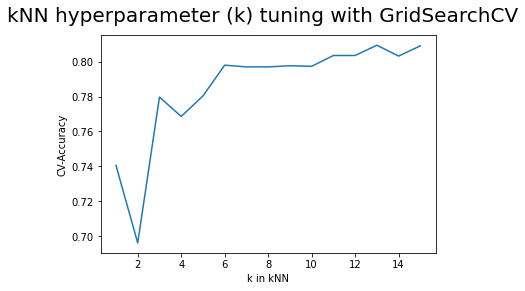

In [20]:
fig3 = plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
fig3.suptitle('kNN hyperparameter (k) tuning with GridSearchCV', fontsize=20)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

In [23]:
# TRAINING PHASE
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=cross_validation_fold, scoring='accuracy', refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='accuracy')

In [24]:
# since refit=True,we can directly use grid_search object above as our final best model or you can do as follow:
optimal_knn = grid_search.best_estimator_
optimal_knn

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [25]:
# TESTING PHASE
# accuracy on test data
optimal_knn.score(X_test, y_test)

0.7752808988764045